In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load the data
train_data = pd.read_csv('./Training_dataset.csv')
test_data = pd.read_csv('./Test_dataset.csv')

In [67]:
# Data preprocessing
def preprocess_data(df):
    # Handle missing values
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
    
    # Convert categorical variables to numeric
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    df['Married'] = le.fit_transform(df['Married'])
    df['Education'] = le.fit_transform(df['Education'])
    df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
    df['Property_Area'] = le.fit_transform(df['Property_Area'])
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = df['Dependents'].astype(int)
    
    return df

In [68]:
#Preprocess the data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

C:\Users\SHRIHARI MAGAR\AppData\Local\Temp\ipykernel_20248\2692157347.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\SHRIHARI MAGAR\AppData\Local\Temp\ipykernel_20248\2692157347.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

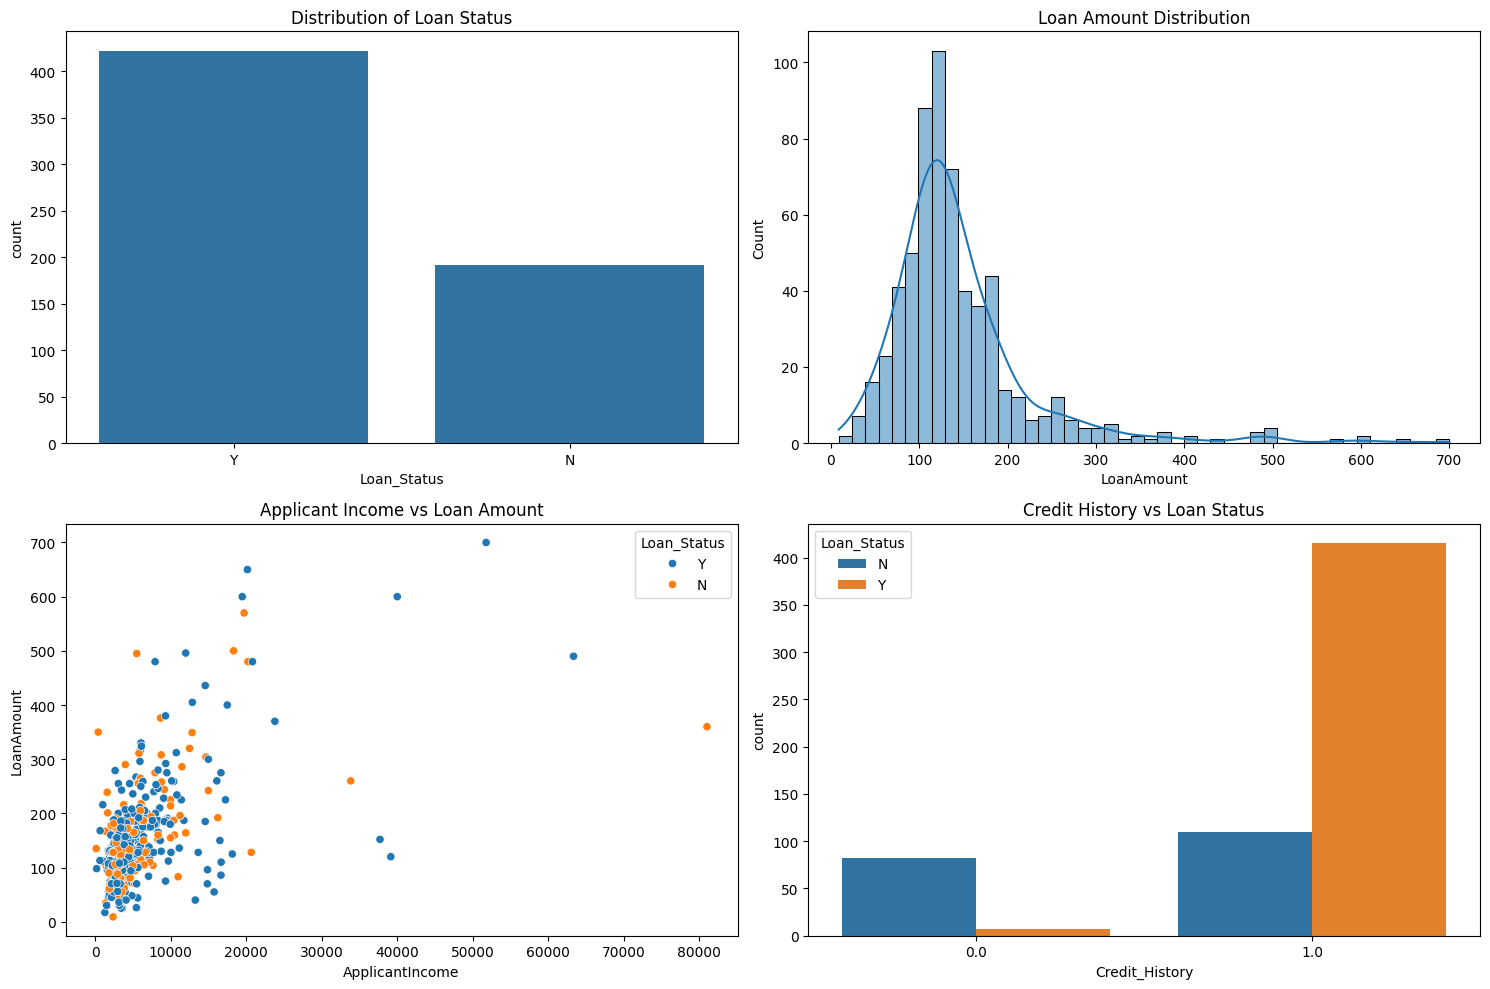

In [69]:
# Plots after preprocessing
plt.figure(figsize=(15, 10))

# Distribution of loan status
plt.subplot(2, 2, 1)
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Distribution of Loan Status')

# Loan amount distribution
plt.subplot(2, 2, 2)
sns.histplot(train_data['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')

# Applicant Income vs Loan Amount
plt.subplot(2, 2, 3)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Applicant Income vs Loan Amount')

# Credit History vs Loan Status
plt.subplot(2, 2, 4)
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title('Credit History vs Loan Status')

plt.tight_layout()
plt.show()

In [70]:
# Feature engineering
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

In [71]:
# Separate features and target variable
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [72]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.metrics import classification_report
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
print("\nUpdated Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))


Updated Classification Report on Validation Set:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [74]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.77


In [75]:
# Feature importance plot
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

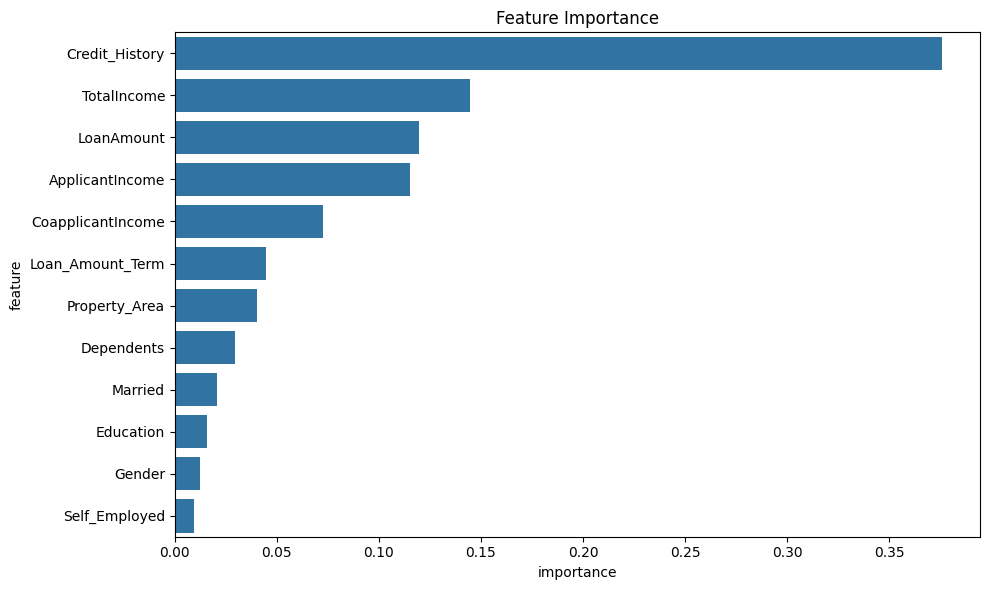

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [77]:
# Make predictions on the test set
X_test = test_data.drop('Loan_ID', axis=1)
test_predictions = rf_model.predict(X_test)


In [78]:
# Plots before creating submission file
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(50.722222222222214, 0.5, 'Actual')

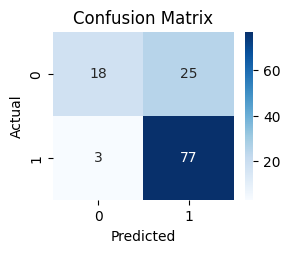

In [79]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [80]:
# Encode y_val for ROC curve calculation
y_val_encoded = (y_val == 'Y').astype(int)

In [81]:
# Plots before creating submission file
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

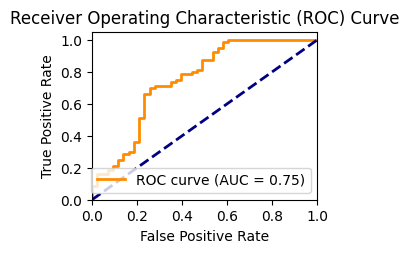

In [82]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val_encoded, rf_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

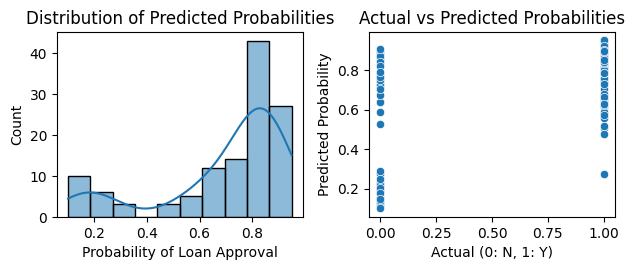

In [83]:
# Distribution of predicted probabilities
plt.subplot(2, 2, 3)
sns.histplot(rf_model.predict_proba(X_val)[:, 1], kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Loan Approval')

# Actual vs Predicted
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_val_encoded, y=rf_model.predict_proba(X_val)[:, 1])
plt.title('Actual vs Predicted Probabilities')
plt.xlabel('Actual (0: N, 1: Y)')
plt.ylabel('Predicted Probability')

plt.tight_layout()
plt.show()

In [84]:
# Make predictions on the test set
X_test = test_data.drop('Loan_ID', axis=1)
test_predictions = rf_model.predict(X_test)

print("Raw predictions:")
print(test_predictions[:10])  # Print first 10 predictions
print("Prediction data type:", type(test_predictions[0]))
print("Unique values in predictions:", np.unique(test_predictions))

# Create submission file
submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})

print("\nSubmission DataFrame after initial creation:")
print(submission.head())
print(submission['Loan_Status'].value_counts())

# Try to map the values
submission['Loan_Status'] = submission['Loan_Status'].map({0: 'N', 1: 'Y'})

print("\nSubmission DataFrame after mapping:")
print(submission.head())
print(submission['Loan_Status'].value_counts())

if not set(submission['Loan_Status']) == {'Y', 'N'}:
    submission['Loan_Status'] = submission['Loan_Status'].apply(lambda x: 'Y' if x == 1 or x == '1' else 'N')
    print("\nApplied forced conversion")

print("\nFinal Submission DataFrame:")
print(submission.head())
print(submission['Loan_Status'].value_counts())

submission.to_csv('submission.csv', index=False)

print("\nSubmission file created successfully.")

Raw predictions:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']
Prediction data type: <class 'str'>
Unique values in predictions: ['N' 'Y']

Submission DataFrame after initial creation:
    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y
Loan_Status
Y    304
N     63
Name: count, dtype: int64

Submission DataFrame after mapping:
    Loan_ID Loan_Status
0  LP001015         NaN
1  LP001022         NaN
2  LP001031         NaN
3  LP001035         NaN
4  LP001051         NaN
Series([], Name: count, dtype: int64)

Applied forced conversion

Final Submission DataFrame:
    Loan_ID Loan_Status
0  LP001015           N
1  LP001022           N
2  LP001031           N
3  LP001035           N
4  LP001051           N
Loan_Status
N    367
Name: count, dtype: int64

Submission file created successfully.
